# 단일 신경망을 사용한 네트워크를 실험한 코드입니다.

In [92]:
#그냥 실행시키시면 자동으로 다운로드 됩니다.
import os
import tqdm
files = {"X_val_enc":"1IAvlfsYw13kC6jVUj6jOdqSAwBNQLS3G",
         "X_train_enc":"1rPCnDqif5epOr-F2ypwnoUX9k8TcO4Ia",
         "X_test_enc":"1ctp5kNmNzljgsi1W8X4W7gN3o7y6flUJ",
        "X_val":"1-7CBfLwKpPAqFqA1vq8EZJe1olGw3zsu",
         "X_train":"1-18adV66ZrHnpzsfer6MfS7HU71CT0Cf",
         "X_test":"1-9vV59f_kCgTuh-P-_Nq5uSHzshBCpvT",
         "y_train":"1LH2LoFZg8YgjBHCNvPEGD_ltROLohaYI",
         "y_test":"1-4nHZFlaHKshaa_CE6w36z4gL9bVrz6k",
         "y_val":"1-1N-5ilxadcYtWguUPAS21BbfzUiLgDl"}
print("Now starting To download!")
for name, idx in tqdm.tqdm_notebook(files.items()):
    os.system(f'wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id={idx}" -O- | sed -rn "s/.*confirm=([0-9A-Za-z_]+).*/\1\n/p")&id={idx}" -O {name}.npy && rm -rf /tmp/cookies.txt')

Now starting To download!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [93]:
import numpy as np

X_auto_val = np.load("X_val_enc.npy")
X_auto_test = np.load("X_test_enc.npy")
X_auto_train = np.load("X_train_enc.npy")

X_val = np.load("X_val.npy")
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")

y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

In [94]:
X_train.shape

(153, 5000, 12)

In [95]:
from tensorflow.keras.layers import Dropout, Flatten, LSTM, Dense, Input
from keras.models import Sequential, Model

In [130]:
xInput = Input(batch_shape=(None, 256, 1))
# xLstm = LSTM(8)(xInput)
xLstm = Flatten()(xInput)
# xLstm = Dense(8, activation = "relu")(xLstm)
# xLstm = Dropout(0.5)(xLstm)
# xLstm = Dense(4, activation = "relu")(xLstm)
# xLstm = Dropout(0.5)(xLstm)
xLstm = Dense(4, activation = "relu")(xLstm)
xLstm = Dropout(0.5)(xLstm)
xOutput = Dense(2, activation = "softmax")(xLstm)
model = Model(xInput, xOutput)
print(model.summary())

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 1)]          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 1028      
_________________________________________________________________
dropout_15 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 10        
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
from tensorflow.keras.utils import to_categorical

one_y_train = to_categorical(y_train)
one_y_test = to_categorical(y_test)
one_y_val = to_categorical(y_val)

In [136]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(X_auto_train, one_y_train, epochs=10, validation_data = (X_auto_val, one_y_val), batch_size = 32)

Epoch 1/10
5/5 [==============================] - 0s 28ms/step - loss: 0.7711 - accuracy: 0.6536 - val_loss: 0.8634 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8720 - accuracy: 0.6013 - val_loss: 0.8540 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.7242 - accuracy: 0.6340 - val_loss: 0.8484 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.8932 - accuracy: 0.5817 - val_loss: 0.8362 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.8283 - accuracy: 0.5556 - val_loss: 0.8258 - val_accuracy: 0.3704
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.5752 - val_loss: 0.8174 - val_accuracy: 0.3704
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7387 - accuracy: 0.6667 - val_loss: 0.8142 - val_accuracy: 0.4444
Epoch 8/10
5/5 [=================

In [137]:
model.save("/content/bestDense1.h5")
# model.save("/content/bestDense2.h5")

In [138]:
import tensorflow as tf

dense1 = tf.keras.models.load_model("/content/bestDense1.h5")
# dense2 = tf.keras.models.load_model("/content/bestDense2.h5")

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(dense1.predict([X_auto_test]), axis = 1)))
# print(classification_report(y_test, np.argmax(dense2.predict([X_auto_test]), axis = 1)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.57      0.67      0.62         6

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20



In [149]:
xInput = Input(batch_shape=(None, 60000, 1))
# xLstm = LSTM(8)(xInput)
xLstm = Flatten()(xInput)
# xLstm = Dense(8, activation = "relu")(xLstm)
# xLstm = Dropout(0.5)(xLstm)
# xLstm = Dense(4, activation = "relu")(xLstm)
# xLstm = Dropout(0.5)(xLstm)
xLstm = Dense(4, activation = "relu")(xLstm)
xLstm = Dropout(0.5)(xLstm)
xOutput = Dense(2, activation = "softmax")(xLstm)
model = Model(xInput, xOutput)
print(model.summary())

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 60000, 1)]        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 60000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 240004    
_________________________________________________________________
dropout_17 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 240,014
Trainable params: 240,014
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(X_train.reshape(X_train.shape[0], 60000), one_y_train, epochs=10, validation_data = (X_val.reshape(X_val.shape[0], 60000), one_y_val), batch_size = 16)

Epoch 1/10
10/10 [==============================] - 0s 16ms/step - loss: 4.1112 - accuracy: 0.6993 - val_loss: 7.1914 - val_accuracy: 0.5185
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 6.0208 - accuracy: 0.5686 - val_loss: 7.9537 - val_accuracy: 0.4815
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 4.7050 - accuracy: 0.6536 - val_loss: 8.5700 - val_accuracy: 0.4444
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 5.8398 - accuracy: 0.5490 - val_loss: 8.5693 - val_accuracy: 0.4444
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 5.8568 - accuracy: 0.5359 - val_loss: 8.5689 - val_accuracy: 0.4444
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 5.2615 - accuracy: 0.5882 - val_loss: 8.5684 - val_accuracy: 0.4444
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 4.9238 - accuracy: 0.6275 - val_loss: 7.9762 - val_accuracy: 0.4815
Epoch 8/10
10/10 [=

In [151]:
model.save("/content/bestDenseFull.h5")
# model.save("/content/bestDense2.h5")

In [152]:
import tensorflow as tf

densef = tf.keras.models.load_model("/content/bestDenseFull.h5")
# dense2 = tf.keras.models.load_model("/content/bestDense2.h5")

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(densef.predict([X_test.reshape(20, 60000)]), axis = 1)))
# print(classification_report(y_test, np.argmax(dense2.predict([X_auto_test]), axis = 1)))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.40      0.67      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.62      0.58        20
weighted avg       0.68      0.60      0.62        20



In [154]:
## Evaluation Function

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def evaluation(y_true, y_pred, model_name = "Temp Name"): 
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=[8,8])
    plt.title(model_name+" confusion matrix", fontsize = 20)
    labels = ["Positive", "Negative"]
    conf_m = pd.DataFrame(confusion_matrix(y_true, y_pred), index = labels, columns = labels)
    ax = sns.heatmap(conf_m, cmap="Blues", annot=True,fmt='5')
    plt.yticks(va="center")
    plt.savefig("/content/"+model_name+"_confusion_matrix.pdf")
    plt.savefig("/content/"+model_name+"_confusion_matrix.jpg")

def AUROC_Curve(y_true, y_pred_softmax, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_softmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.savefig("/content/"+model_name+"_auroc_curve.pdf")
    plt.savefig("/content/"+model_name+"_auroc_curve.jpg")
    plt.show()

In [155]:
y_pred_softmax = dense1.predict([X_auto_test])
y_pred = np.argmax(y_pred_softmax,axis = 1)

# 인코딩된 데이터의 결과

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.57      0.67      0.62         6

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20



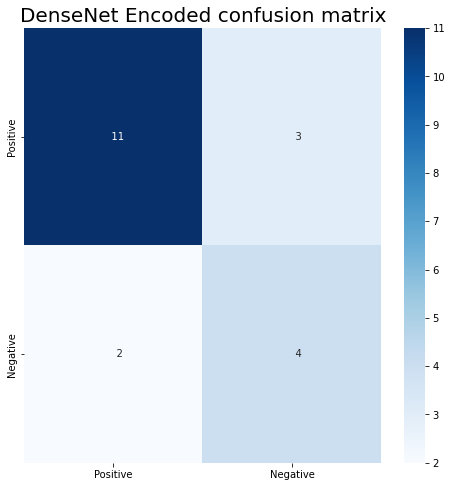

In [156]:
evaluation(y_test , y_pred , "DenseNet Encoded")

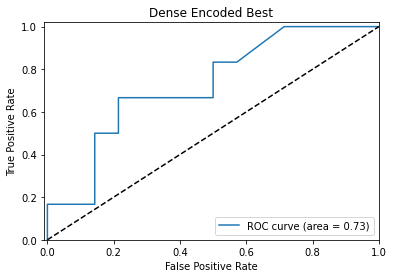

In [157]:
# roc_curve(y_test, y_pred_softmax)
AUROC_Curve(y_test, y_pred_softmax[:,1], "Dense Encoded Best")

In [158]:
y_pred_softmax = densef.predict([X_test.reshape([20, 60000])])
y_pred = np.argmax(y_pred_softmax,axis = 1)

# 인코딩 안된 데이터의 결과

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.40      0.67      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.62      0.58        20
weighted avg       0.68      0.60      0.62        20



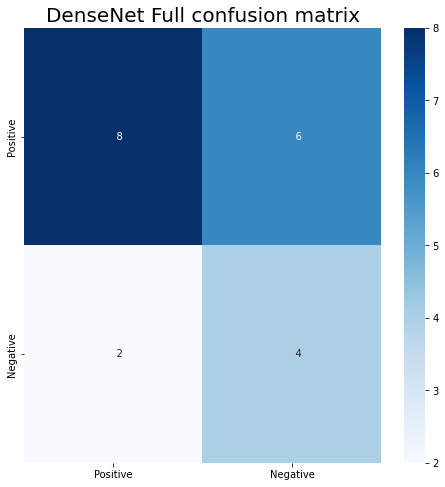

In [159]:
evaluation(y_test , y_pred , "DenseNet Full")

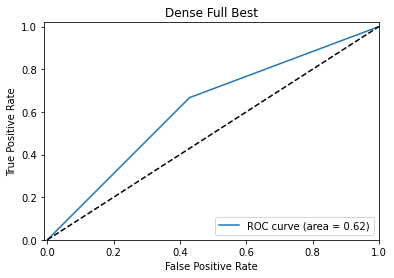

In [160]:
# roc_curve(y_test, y_pred_softmax)
AUROC_Curve(y_test, y_pred_softmax[:,1], "Dense Full Best")